In [108]:
import pandas as pd
df = pd.read_excel("exceldata/books_data/master.xlsx")
import matplotlib.pyplot as plt
import start_end as se
import nltk
import aa_authorwords as aa

In [86]:
list(df)

[u'title',
 u'Author Names',
 u'lexical_diversity',
 u'Avg Sent Length',
 u'qmarks/sent',
 u'ex_marks/sent',
 u'commas/sent',
 u'semi/sent',
 u'colon/sent']

### I chose the following 40 books, each from a different author, to analyze.  I decided to open up the range of authors. Doing so will facilitate more interesting comparative analysis than analyzing texts across an author's carreer, which was my previous plan.

In [87]:
df[['title','Author Names']]

,title,Author Names
0,adventuresofsherlockholmes,Arthur Conan Doyle
1,ageofinnocence,Edith Wharton
2,alicesadventures,Lewis Carroll
3,anenquiry,David Hume
4,annakarenina,Leo Tolstoy
5,autobiography,John Stuart Mill
6,brotherskaramazov,Fyodor Dostoyevsky
7,callofthewild,Jack London
8,donquixote,Miguel de Cervantes
9,emma,Jane Austen


### I first performed basic cleaning: I removed quotation marks, which may have been unecessary to do but seemed to mess up the tokens, and made all the text lowercase.  I built a simple program to read UTF-8 texts from Project Gutenberg, and strip all the meta-data text from the beginning and end.

### I then used NLTK to tokenize the text and take lexical diversity scores from each.  To   The result I put into the Excel file from which this notebook is reading:

In [88]:
df[['title','lexical_diversity']]

,title,lexical_diversity
0,adventuresofsherlockholmes,0.066659
1,ageofinnocence,0.079842
2,alicesadventures,0.094164
3,anenquiry,0.081614
4,annakarenina,0.035229
5,autobiography,0.084960
6,brotherskaramazov,0.035543
7,callofthewild,0.134271
8,donquixote,0.033167
9,emma,0.043615


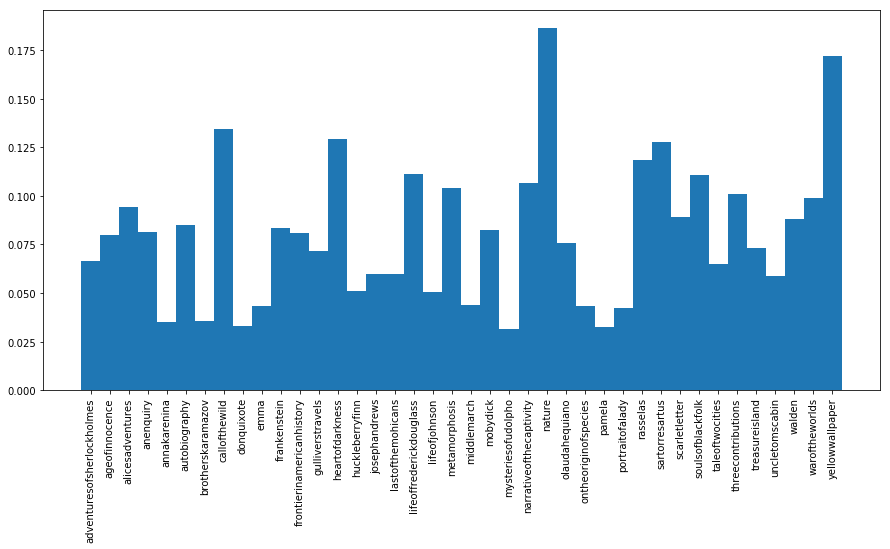

In [89]:
x = range(0,40)
y = df['lexical_diversity']
titles = df['title']
plt.figure(num=None, figsize=(15,7))
plt.bar(x,y, width=1)
plt.xticks(x, titles, rotation='vertical')

plt.show()


### The average sentence length for each book is:

In [90]:
df[['title', 'Avg Sent Length']]

,title,Avg Sent Length
0,adventuresofsherlockholmes,81.196061
1,ageofinnocence,114.500000
2,alicesadventures,144.339069
3,anenquiry,195.810611
4,annakarenina,93.033724
5,autobiography,235.887665
6,brotherskaramazov,81.455157
7,callofthewild,101.904481
8,donquixote,244.675465
9,emma,120.260959


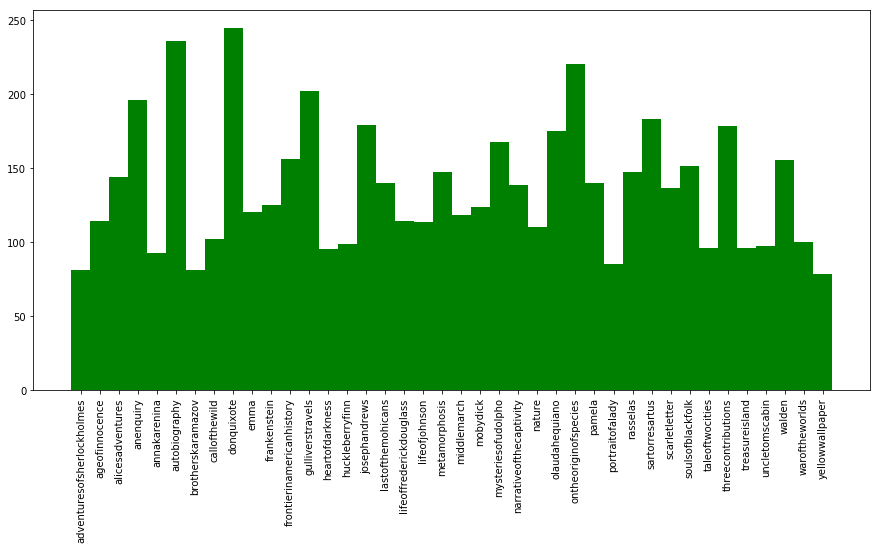

In [91]:
x = range(0,40)
y = df['Avg Sent Length']
titles = df['title']
plt.figure(num=None, figsize=(15,7))
plt.bar(x,y, width=1, color='g')
plt.xticks(x, titles, rotation='vertical')

plt.show()

In [92]:
list(df)

[u'title',
 u'Author Names',
 u'lexical_diversity',
 u'Avg Sent Length',
 u'qmarks/sent',
 u'ex_marks/sent',
 u'commas/sent',
 u'semi/sent',
 u'colon/sent']

### Question marks per sentence:

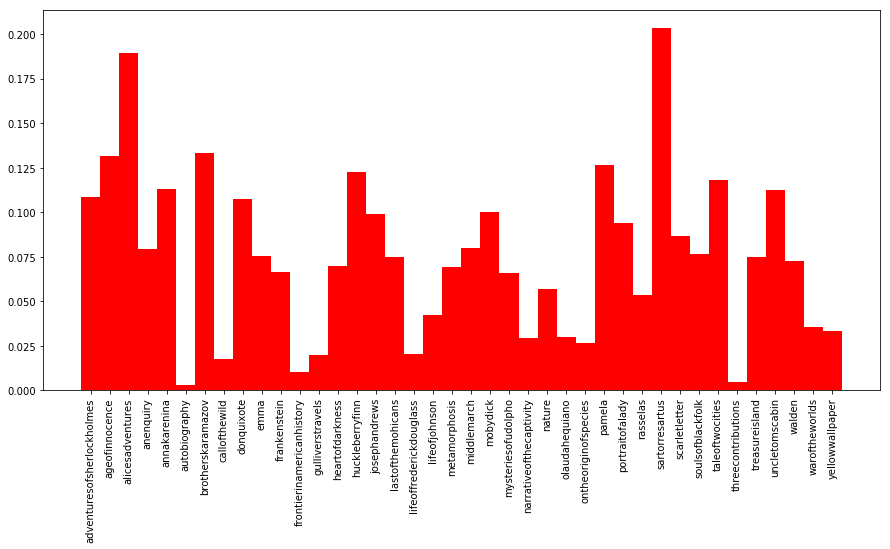

In [93]:
x = range(0,40)
y = df['qmarks/sent']
titles = df['title']
plt.figure(num=None, figsize=(15,7))
plt.bar(x,y, width=1, color='r')
plt.xticks(x, titles, rotation='vertical')

plt.show()

### Exclamation marks per sentence:

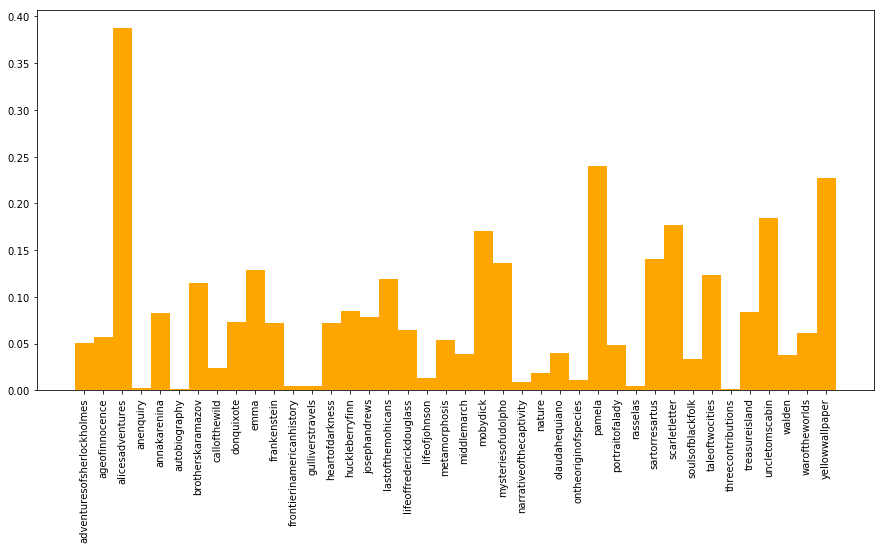

In [94]:
x = range(0,40)
y = df['ex_marks/sent']
titles = df['title']
plt.figure(num=None, figsize=(15,7))
plt.bar(x,y, width=1, color='orange')
plt.xticks(x, titles, rotation='vertical')

plt.show()

### Commas per sentence:

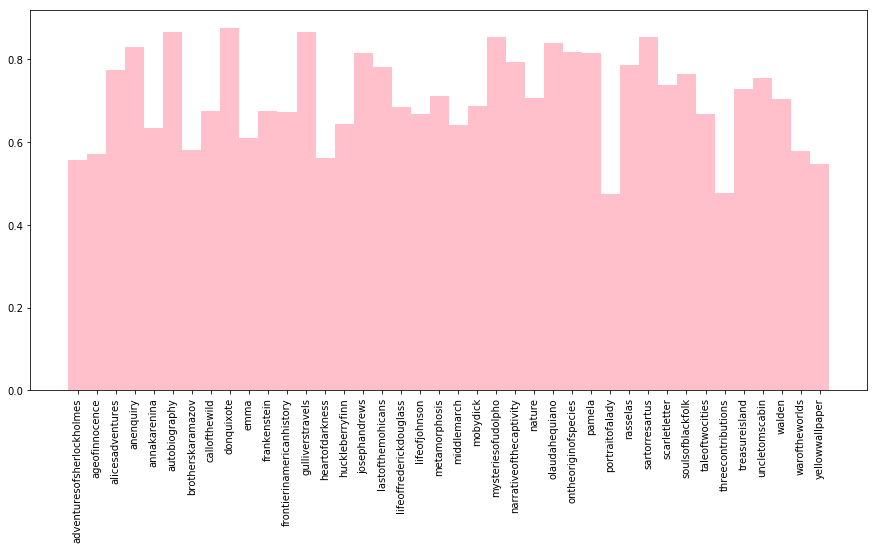

In [95]:
x = range(0,40)
y = df['commas/sent']
titles = df['title']
plt.figure(num=None, figsize=(15,7))
plt.bar(x,y, width=1, color='pink')
plt.xticks(x, titles, rotation='vertical')

plt.show()

### Semicolons per sentence:

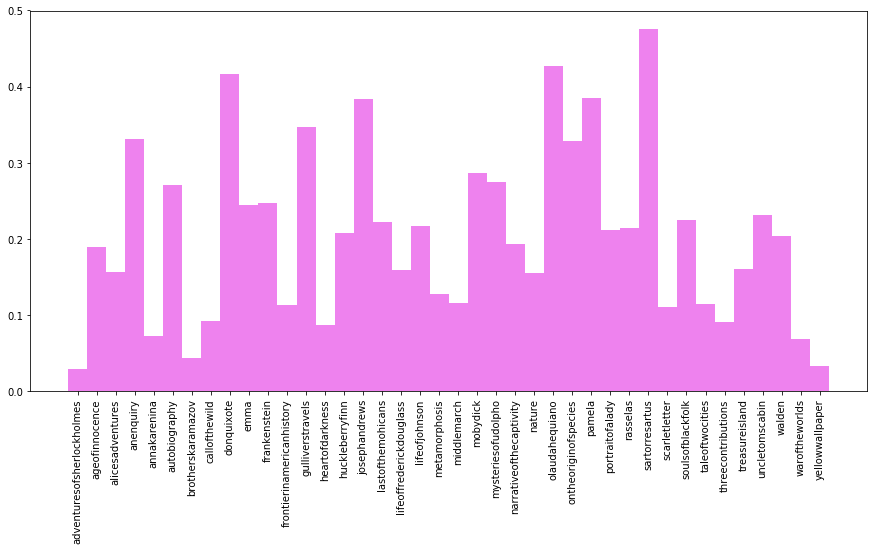

In [96]:
x = range(0,40)
y = df['semi/sent']
titles = df['title']
plt.figure(num=None, figsize=(15,7))
plt.bar(x,y, width=1, color='violet')
plt.xticks(x, titles, rotation='vertical')

plt.show()

### Colons per sentence:

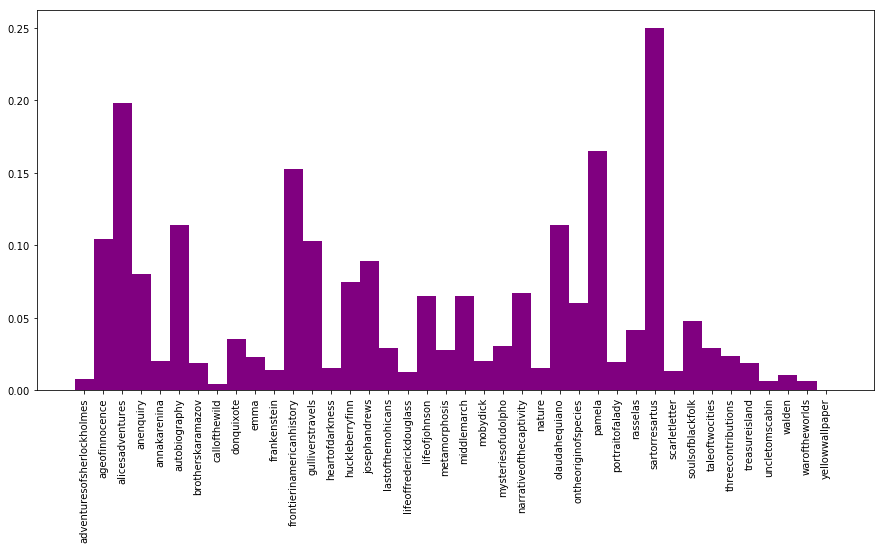

In [97]:
x = range(0,40)
y = df['colon/sent']
titles = df['title']
plt.figure(num=None, figsize=(15,7))
plt.bar(x,y, width=1, color='purple')
plt.xticks(x, titles, rotation='vertical')

plt.show()

### I then created a simple dataframe which includes every sentence from each book. The columns thus far are title, sentence, lowercase sentence, and sentence length. 

In [177]:
df = pd.read_excel("exceldata/sentenceData/sentences.xlsx")

In [178]:
df.shape

(227426, 5)

In [179]:
list(df)

[u'title', u'sentence', u'lowercase_sent', u'length', u'lexical_div']

In [169]:
df.head()

,title,sentence,lowercase_sent,length,lexical_div
0,middlemarch,.,.,1,0.045257
1,middlemarch,.,.,1,0.045257
2,middlemarch,.,.,1,0.045257
3,middlemarch,.,.,1,0.045257
4,middlemarch,.,.,1,0.045257


In [185]:
df.sort('length').tail()


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,sentence,lowercase_sent,length,lexical_div
84175,walden,I sometimes dream of a larger and more populou...,i sometimes dream of a larger and more populou...,1879,0.088263
100304,pamela,"As we came home together in the chariot, he ga...","as we came home together in the chariot, he ga...",1940,0.032507
115537,frontierinamericanhistory,Here the minister's hand is probably absent:\n...,here the minister's hand is probably absent:\n...,2376,0.081785
71864,mobydick,"Though in many natural objects, whiteness refi...","though in many natural objects, whiteness refi...",2765,0.082380
207194,threecontributions,INDEX\n\n\nAberrations (see Perversions)\n a ...,index\n\n\naberrations (see perversions)\n a ...,38408,0.101291


### Sorting the lengths manually shows that the sentence lengths of below 22 yield poor data. I also manually deleted the Index of Three Sexualities. There are still many more instances of questionable data, but for now, I'm filtering it according to the 22 and up criterion.

In [193]:
cols = ['length']
df[cols] = df[df[cols]>21][cols]
df = df.dropna()
df.sort('length')

/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,title,sentence,lowercase_sent,length,lexical_div
19387,portraitofalady,"No, I don’t mean that.","no, i don’t mean that.",22.0,0.042364
158656,brotherskaramazov,I\n\ndon’t want harmony.,i\n\ndon’t want harmony.,22.0,0.035541
158597,brotherskaramazov,Why are you trying me?,why are you trying me?,22.0,0.035541
158583,brotherskaramazov,"cried Ivan, delighted.","cried ivan, delighted.",22.0,0.035541
158549,brotherskaramazov,But these little ones!,but these little ones!,22.0,0.035541
87648,adventuresofsherlockholmes,"What of the rat, then?","what of the rat, then?",22.0,0.069476
177202,lifeofjohnson,"'Sir, you MAY wonder.'","'sir, you may wonder.'",22.0,0.050584
41947,emma,But in time they will.,but in time they will.,22.0,0.043615
158375,brotherskaramazov,And so I’ve told\n\nyou.,and so i’ve told\n\nyou.,22.0,0.035541
12960,middlemarch,Was Mr. Lydgate there?,was mr. lydgate there?,22.0,0.045257


In [199]:
df = df.dropna(axis=0)
df.sort('length').tail()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,title,sentence,lowercase_sent,length,lexical_div
84175,walden,I sometimes dream of a larger and more populou...,i sometimes dream of a larger and more populou...,1879.0,0.088263
100304,pamela,"As we came home together in the chariot, he ga...","as we came home together in the chariot, he ga...",1940.0,0.032507
115537,frontierinamericanhistory,Here the minister's hand is probably absent:\n...,here the minister's hand is probably absent:\n...,2376.0,0.081785
71864,mobydick,"Though in many natural objects, whiteness refi...","though in many natural objects, whiteness refi...",2765.0,0.082380
207194,threecontributions,INDEX\n\n\nAberrations (see Perversions)\n a ...,index\n\n\naberrations (see perversions)\n a ...,38408.0,0.101291


In [204]:
df = df[df.length != 38408]
df.sort('length').tail()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,title,sentence,lowercase_sent,length,lexical_div
143816,donquixote,"It so happened, then, that Luscinda having beg...","it so happened, then, that luscinda having beg...",1820.0,0.034023
84175,walden,I sometimes dream of a larger and more populou...,i sometimes dream of a larger and more populou...,1879.0,0.088263
100304,pamela,"As we came home together in the chariot, he ga...","as we came home together in the chariot, he ga...",1940.0,0.032507
115537,frontierinamericanhistory,Here the minister's hand is probably absent:\n...,here the minister's hand is probably absent:\n...,2376.0,0.081785
71864,mobydick,"Though in many natural objects, whiteness refi...","though in many natural objects, whiteness refi...",2765.0,0.082380


In [206]:
df.sort('length').head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,sentence,lowercase_sent,length,lexical_div
108257,treasureisland,"asked Silver, quietly.","asked silver, quietly.",22.0,0.075530
52431,uncletomscabin,"No object at all, sir.","no object at all, sir.",22.0,0.058678
165220,brotherskaramazov,Where was he murdered?,where was he murdered?,22.0,0.035541
130411,annakarenina,With the\nprince still?,with the\nprince still?,22.0,0.036470
131898,annakarenina,I’m still the\nsame....,i’m still the\nsame....,22.0,0.036470


### A first question I asked is whether sentence length relates to lexical diversity. This comparison revealed some messed up data points. There were sentences of length 8989 and 38408--the Chapter list of Don Quixote and the index of Three Contributions to the Theory of sex -- which I fixed.  I used df.iloc[index number] to find out why the sentences functioned incorrectly.

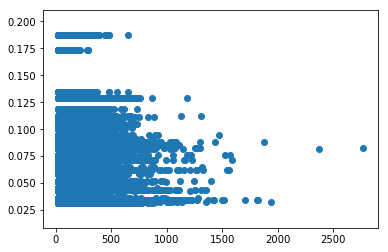

In [205]:
x = df['length']
y = df['lexical_div']
plt.scatter(x,y)
plt.show()

### State of the project: I still have to figure out how to clean the data better.  I have a good set of texts and a good problem.  I want to be able to input a user generated sentence, and return which author's style that sentence most resembles. 
### I am still a ways away from effectively analyzing the data, but I have, I assure you, been putting a lot of work into this. 

